# Loan Application Status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/Users/rekhagrg/Downloads/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.shape

(614, 13)

In [5]:
df_cleaned=df.dropna()

In [6]:
df_cleaned.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df_cleaned.shape

(480, 13)

In [8]:
df_cleaned.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df_cleaned["Loan_Status"].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [10]:
updated_df=df_cleaned.drop('Loan_ID', axis=1)

In [11]:
updated_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
updated_df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [13]:
updated_df["Married"].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [14]:
updated_df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
updated_df["Education"].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [16]:
updated_df["Self_Employed"].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [17]:
updated_df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [18]:
# using label encoding to encode the categorical data
clone_df=updated_df

mapping={'Yes':1,'No':0,'Graduate': 0,'Not Graduate':1,'Male':0,'Female':1,'Semiurban':0,'Urban':1,'Rural':2,'0':0,'2':2,'1':1,'3+':3}
clone_df['Education']=clone_df['Education'].map(mapping)
clone_df['Self_Employed']=clone_df['Self_Employed'].map(mapping)
clone_df['Property_Area']=clone_df['Property_Area'].map(mapping)
clone_df['Dependents']=clone_df['Dependents'].map(mapping)
clone_df['Married']=clone_df['Married'].map(mapping)
clone_df['Gender']=clone_df['Gender'].map(mapping)


In [19]:
clone_df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [20]:
X=clone_df.drop('Loan_Status', axis=1)
y=clone_df['Loan_Status']

In [21]:
np.random.seed(42)
model=RandomForestClassifier()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=model.predict(X_test)

In [24]:
print(accuracy_score(y_pred,y_test))

0.8229166666666666


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           N       0.46      0.87      0.60        15
           Y       0.97      0.81      0.89        81

    accuracy                           0.82        96
   macro avg       0.72      0.84      0.75        96
weighted avg       0.89      0.82      0.84        96



# Hyperparameter using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid={
        'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [27]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=50, random_state=42)


In [28]:
model_grid=RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=50, random_state=42)
model_grid.fit(X_train, y_train)
y_pred_grid=model_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           N       1.00      0.39      0.56        28
           Y       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [29]:
print(accuracy_score(y_pred_grid,y_test))

0.8229166666666666


# Model using Onehot encoder

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


X=updated_df.drop('Loan_Status', axis=1)
y=updated_df['Loan_Status']



In [31]:
# using onehot encoder to encode the categorical values

categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot", one_hot, categorical_features)],
                             remainder="passthrough")

transform_X=transformer.fit_transform(X)
transform_X

array([[  1.,   0.,   0., ..., 128., 360.,   1.],
       [  1.,   0.,   0., ...,  66., 360.,   1.],
       [  1.,   0.,   0., ..., 120., 360.,   1.],
       ...,
       [  1.,   0.,   0., ..., 253., 360.,   1.],
       [  1.,   0.,   0., ..., 187., 360.,   1.],
       [  0.,   1.,   1., ..., 133., 360.,   0.]])

In [32]:
# Splitting the data into train and test sets


np.random.seed(42)

clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test=train_test_split(transform_X,y, test_size=0.2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8229166666666666

In [33]:
y_pred=clf.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.87      0.46      0.60        28
           Y       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



# Hyperparameter tuning using gridsearchCV

In [35]:


param_grid={
        'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [36]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25, random_state=42)


In [37]:
model_grid=RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25, random_state=42)
model_grid.fit(X_train, y_train)
y_pred_grid=model_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           N       1.00      0.39      0.56        28
           Y       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [38]:
print(accuracy_score(y_pred_grid,y_test))

0.8229166666666666


# Using support vector machine

In [39]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [40]:
y_pred_svm=model_svm.predict(X_test)

In [41]:
print(accuracy_score(y_pred_svm,y_test))

0.7083333333333334


# using Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)
print(accuracy_score(y_pred_lr,y_test))
print(classification_report(y_pred_lr,y_test))

0.8125
              precision    recall  f1-score   support

           N       0.39      0.92      0.55        12
           Y       0.99      0.80      0.88        84

    accuracy                           0.81        96
   macro avg       0.69      0.86      0.72        96
weighted avg       0.91      0.81      0.84        96



# visualization 

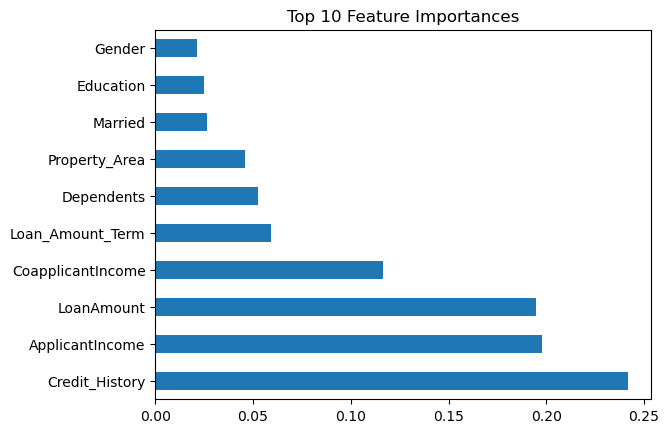

In [83]:
# Feature Importance Plot for RandomForest
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


In [89]:
np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100)

# Use stratify to ensure a proportional split of classes
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2, stratify=y)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (384, 20)
X_test shape: (96, 20)
y_train shape: (384,)
y_test shape: (96,)


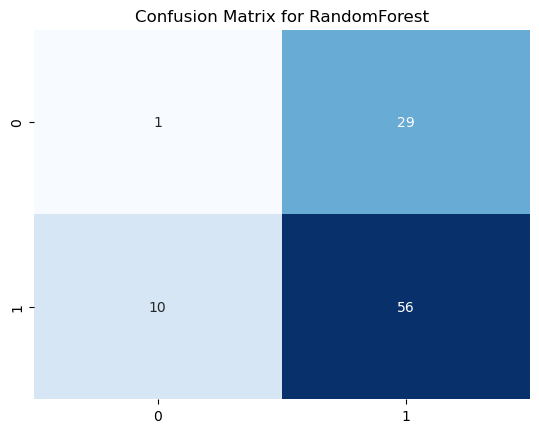

In [91]:
# Assuming 'Y' is mapped to 1 and 'N' is mapped to 0
y_pred_int = np.where(y_pred_grid == 'Y', 1, 0)

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred_int)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for RandomForest')
plt.show()


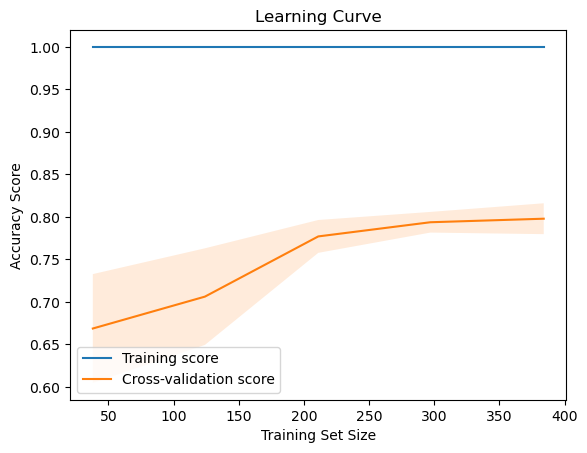

In [94]:
from sklearn.model_selection import learning_curve

# Assuming clf is your RandomForestClassifier
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
